<a href="https://colab.research.google.com/github/Mukolwe29/Mukolwe29/blob/main/BIG_DATA_project_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Big Data Final Project - Predicting Airbnb Listing Prices in Melbourne__ {-}

---

**Overview:**   
In this Project
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models
- Project Task Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts

Lets start off by checking in our dataset

In [ ]:
#Upload data file (GOOGLE COLAB)
from google.colab import files
uploaded = files.upload()

In [ ]:

import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_metaData = pd.read_csv('metaData.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

# Merging the train and test dataset for data cleaning and preprocessing.
df = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
print(df.shape)
df.describe()
df.info()

(10000, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            10000 non-null  int64  
 1   source                                        10000 non-null  object 
 2   name                                          9999 non-null   object 
 3   description                                   9912 non-null   object 
 4   neighborhood_overview                         6753 non-null   object 
 5   host_name                                     10000 non-null  object 
 6   host_since                                    10000 non-null  object 
 7   host_location                                 7950 non-null   object 
 8   host_about                                    6289 non-null   object 
 9   host_response_time                            9263

In [ ]:
## CODE FOR TYPES OF VARIABLES / FEATURES
#from tabulate import tabulate
data_types = df.dtypes

numeric_vars = []
ordinal_vars = []
nominal_vars = []
text_vars = []
date_vars = []

# Categorising variables based on their data types
for column_name, dtype in data_types.items():
    if dtype == 'object':
        unique_count = len(df[column_name].unique())
        if unique_count > 10:
            text_vars.append(column_name)
        else:
            nominal_vars.append(column_name)
    elif dtype == 'int64' or dtype == 'float64':
        numeric_vars.append(column_name)
    elif dtype == 'datetime64':
        date_vars.append(column_name)
    else:
        nominal_vars.append(column_name)

# Print
print("Numeric Variables:")
#print(tabulate(df, numeric_vars, tablefmt="grid"))
print(numeric_vars)
print("\nOrdinal Variables:")  # Define your criteria for ordinal variables if known
print(ordinal_vars)
print("\nNominal Variables:")
print(nominal_vars)
print("\nText Variables:")
print(text_vars)
print("\nDate Variables:")
print(date_vars)

Numeric Variables:
['ID', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

Ordinal Variables:
[]

Nominal Variables:
['source', 'host_response_time', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',

In [ ]:
#CONTINUED
missing_values = df.isnull().sum()
variables_with_missing = missing_values[missing_values > 0]

# Display variables with missing values
if variables_with_missing.empty:
    print("No variables with missing values.")
else:
    print("Variables with missing values:")
    print(variables_with_missing)

Variables with missing values:
name                              1
description                      88
neighborhood_overview          3247
host_location                  2050
host_about                     3711
host_response_time              737
host_response_rate              737
host_acceptance_rate            721
host_is_superhost                 2
host_neighbourhood             5526
neighbourhood                  3247
neighbourhood_cleansed          150
property_type                   123
room_type                       175
bathrooms                         6
bedrooms                        438
beds                             84
minimum_minimum_nights           55
maximum_maximum_nights           55
availability_365                 67
first_review                    263
last_review                     263
review_scores_rating            263
review_scores_accuracy          321
review_scores_cleanliness       321
review_scores_checkin           322
review_scores_communication     3

In [ ]:
#TOP 10

value_counts = df.melt().value_counts()

# Get the top 10 most common features
top_10_features = value_counts.head(10)

# Print the top 10 most common features and their frequencies
print("Top 10 most common features:")
for feature, frequency in top_10_features.iteritems():
    print(f"Feature: {feature} - Frequency: {frequency}")

Top 10 most common features:
Feature: ('has_availability', 't') - Frequency: 9986
Feature: ('host_has_profile_pic', 't') - Frequency: 9931
Feature: ('calculated_host_listings_count_shared_rooms', 0) - Frequency: 9806
Feature: ('host_identity_verified', 't') - Frequency: 9445
Feature: ('source', 'city scrape') - Frequency: 8763
Feature: ('room_type', 'Entire home/apt') - Frequency: 7685
Feature: ('instant_bookable', 'f') - Frequency: 7478
Feature: ('host_response_rate', '100%') - Frequency: 7263
Feature: ('calculated_host_listings_count_private_rooms', 0) - Frequency: 7239
Feature: ('host_verifications', "['email', 'phone']") - Frequency: 7154




### **Forecasting Problem**
The forecasting problem at hand involves predicting Airbnb listed prices in Melbourne. The dataset consists of historical data of various Airbnb listings in Melbourne, including features such as property type, neighbourhood, number of bedrooms, bathrooms,  amenities, and other relevant factors. The goal is to build a predictive model using Python to forecast the price of a new listing based on its characteristics. This forecasting task is crucial for both Airbnb hosts and potential guests. Hosts can benefit from accurate price predictions to optimise their listing prices and attract guests while maximizing revenue. On the other hand, guests can leverage this forecast to estimate the cost of their stay and make informed decisions when booking accommodations. Building the forecasting models will involve preprocessing the dataset, performing data analysis and further steps necessary for machine learning to train a model. The trained model will then predict the prices of new listings in Melbourne, providing valuable insights to hosts and guests in the  Airbnb marketplace.

### **Evaluation Criteria**
The RMSE formula calculates the square root of the average of the squared differences between the predicted and actual values. It provides a measure of the average magnitude of the prediction errors.

The formula for RMSE is as follows:

**RMSE = sqrt(sum((y_true - y_pred)^2) / n)**

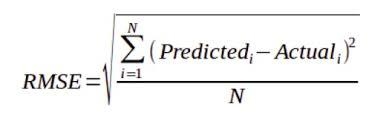

Where:
- y_true: actual values.
- y_pred: predicted values
- n: number of observations

The explanation of the formula:

(A) **Squaring Differences**: First, the formula calculates the difference between each predicted and its corresponding actual value (y_pred & y_true). The difference of these values is then squared in order to ensure all values are positive and amplify larger errors, making them significant. This is then sumed up to obtain the overall magnitude of the prediction errors. The sum of squared differences is divided by the total number of data points (n), giving the average squared difference(MSE).

(B) **Square Root**: the average squared difference is square rooted to obtain the RMSE. Taking the square root provides a measure of the average prediction error in the original scale of the data.
In simpler terms, RMSE measures the typical or average magnitude of the errors made by the forecast model. It quantifies how well the predictions align with the actual values.

A lower RMSE indicates a better fit between the predicted and actual values, implying higher accuracy and smaller prediction errors.

In Python, RMSE is calculated using the scikit-learn library. The formula is as follows:

**rmse = np.sqrt(mean_squared_error(y_true, y_pred))**

### **Types of Variables/Features**
Various types of variables/features play a crucial role in forecasting Airbnb prices. Variables are broadly categorized into three main types: categorical, numerical, and textual.
Categorical variables capture qualitative information about the listings, such as property type, host_neighbourhood, neighbourhood_cleansed and host_location. Numerical variables, on the other hand, represent quantitative attributes of the listings, including the number of bedrooms, bathrooms, guests accommodated, and minimum stay requirements. Additionally, numerical variables may include continuous variables like the size of the property or discrete variables like the count of reviews received. Lastly, textual variables involve natural language descriptions provided by the hosts or guests in the form of names, descriptions of listings, host details and listing titles. These textual features provide valuable insights into the characteristics, unique selling points, and sentiments associated with the property listed on Airbnb.

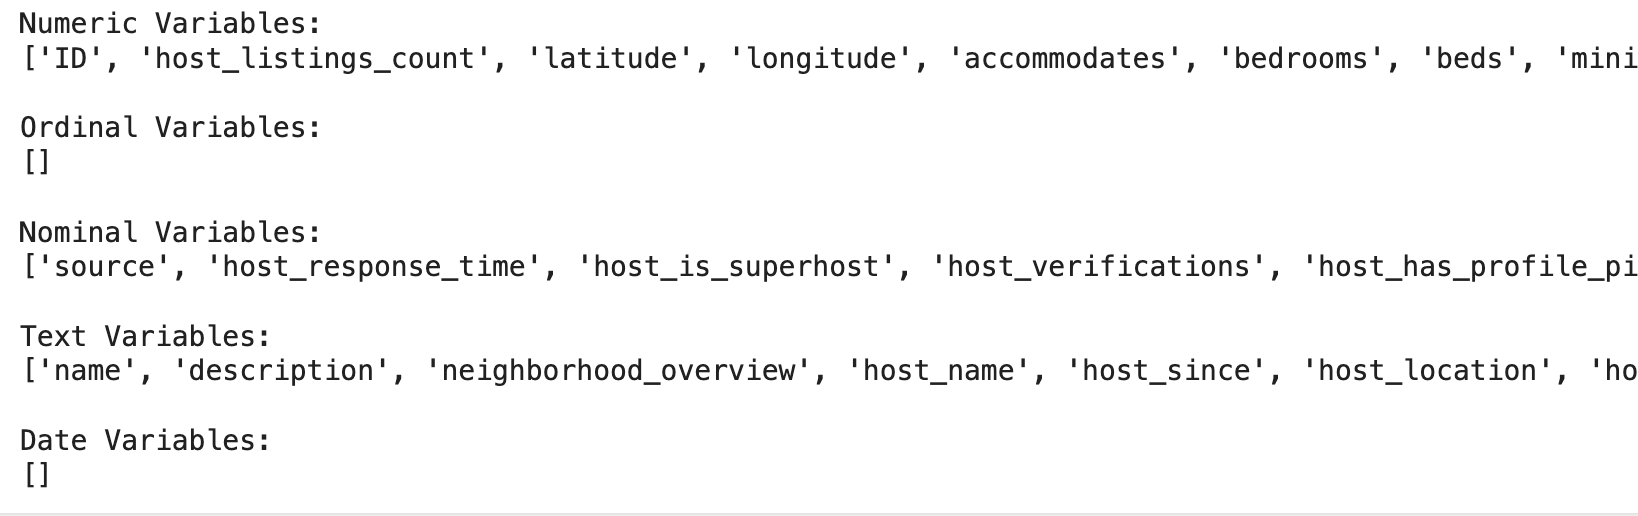


### **Data summary & main data characteristics**
DATA SUMMARY:

The training dataset has around 7000 oberservations with 61 columns and the testing dataset contains 3000 oberservations with 60 columns and the variables are a mix of categorical, numerical and textual.

MAIN DATA CHARACTERISTICS:

*The top 10 most important features are:*
1. If the rental is the entire flat or not - **room_type**: Entire home/apt(77%)
2. How many people the property accommodates - **accommodates**
3. The type of property - property_type = **Other**
4. The number of bathrooms - **bathrooms**
5. How many days are available to book out of the next 90 - **availability _90**
6. The number of reviews - **number_of_reviews**
7. The cancellation policy being moderate - **cancellation_policy_moderate**
8. How many other listings the host has - **host_listings_count**
9. The minimum night stays - **minimum nights**
10. The maximum nights stay - **maximum_nights**


### **Missing Values**
To get missing values *data.isnull().sum()* is used and significant results obtained for the Airbnb dataset are the following:
- reviews_per_month = 263
- neighborhood_overview = 3247
- price = 3000

Missing values occur when there is no recorded data for a particular observation/feature in a dataset. In this case, there are 263 missing reviews_per_month and 3000 missing values in the prices column where the value is missing or not recorded.

Having missing values in a dataset can affect data analysis, modeling and prediction tasks, as it may introduce biases or lead to incomplete overviews. It's important to handle missing values appropriately based on the specific context and goals of your analysis. Some common approaches to dealing with missing values include imputation (replacing missing values with estimated values) or excluding the observations or variables with missing values, depending on the impact on the overall dataset and analysis objectives.

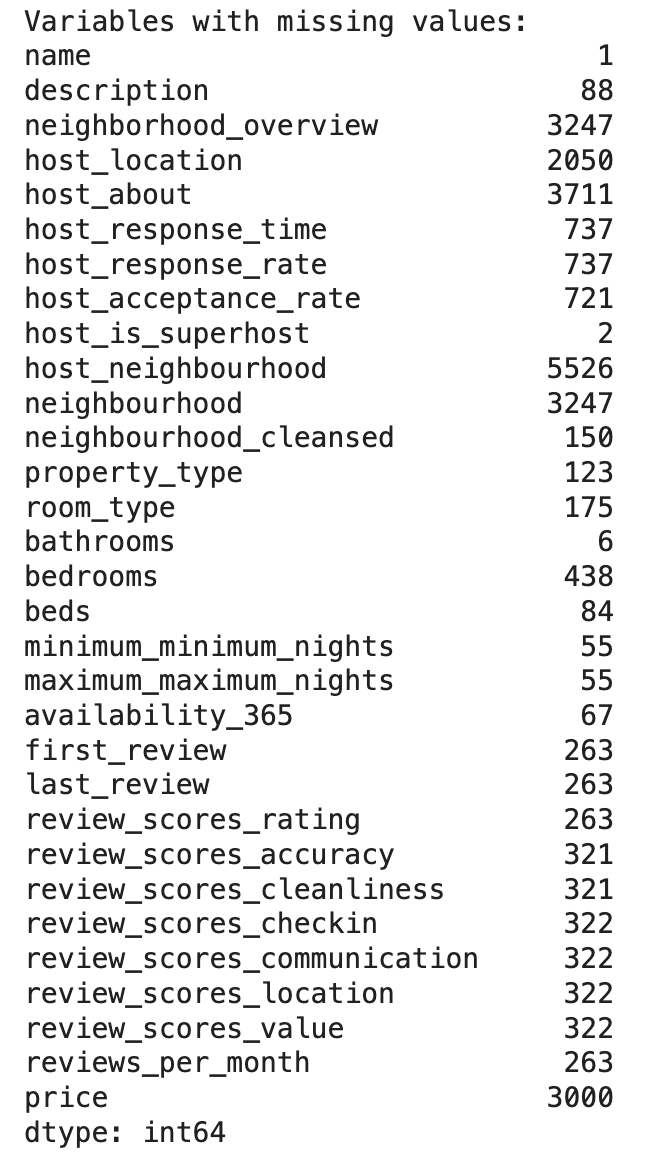


---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}


** Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  


In [ ]:


import pandas as pd

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
# A helper function to clean numerical columns stored as object types
def clean_numerical_columns(df):
    for col in df.select_dtypes(['object']).columns:
        try:
            df[col] = df[col].str.extract('(\d+)').astype(float)
        except:
            continue
    return df
# Clean numerical columns for both test and training datasets
test = clean_numerical_columns(test)
train = clean_numerical_columns(train)

#clean the 'price' column
train['price'] = train['price'].replace('[\$,]', '', regex=True).astype(float)

 Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  


In [ ]:

def create_verification_features(dataframe):
    # Convert host_verifications column to string
    dataframe['host_verifications'] = dataframe['host_verifications'].astype(str)

    dataframe['email_verified'] = dataframe['host_verifications'].apply(lambda x: 1 if 'email' in x else 0)
    dataframe['phone_verified'] = dataframe['host_verifications'].apply(lambda x: 1 if 'phone' in x else 0)
    dataframe['work_email_verified'] = dataframe['host_verifications'].apply(lambda x: 1 if 'work_email' in x else 0)
    return dataframe

df_train = create_verification_features(train)
df_test = create_verification_features(test)
##Test that it worked
print(df_train[['email_verified', 'phone_verified', 'work_email_verified']].head())

   email_verified  phone_verified  work_email_verified
0               0               0                    0
1               0               0                    0
2               0               0                    0
3               0               0                    0
4               0               0                    0


 Impute missing values for all features in both training and test datasets.  make sure you do **not** impute the price in the test dataset.


In [ ]:

##Using Mean for certain numerical features
def impute_mean(dataframe, cols):
    for col in cols:
        dataframe[col] = dataframe[col].fillna(dataframe[col].mean())
    return dataframe

mean_impute = ['minimum_minimum_nights', 'maximum_maximum_nights', 'availability_365',
               'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
               'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
               'review_scores_value', 'reviews_per_month']

df_train = impute_mean(train, mean_impute)
df_test = impute_mean(test, mean_impute)

##Using Median for certain numerical features with outliers
def impute_median(dataframe, cols):
    for col in cols:
        dataframe[col] = dataframe[col].fillna(dataframe[col].median())
    return dataframe

median_impute = ['bedrooms', 'bathrooms', 'beds', 'host_response_rate', 'host_acceptance_rate']

df_train = impute_median(df_train, median_impute)
df_test = impute_median(df_test, median_impute)

##Using mode for categorical variables
def impute_mode(dataframe, cols):
    for col in cols:
        dataframe[col] = dataframe[col].fillna(dataframe[col].mode())
    return dataframe

mode_impute = ['host_response_time', 'name', 'host_location', 'property_type', 'room_type', 'neighborhood_overview', 'description', 'host_about', 'host_neighbourhood', 'neighbourhood','neighbourhood_cleansed','first_review', 'last_review']

df_train = impute_mode(df_train, mode_impute)
df_test = impute_mode(df_test, mode_impute)

##Using other for unnecessasry and hard to predict variables such as property type and room type.
def impute_other(dataframe, cols):
    for col in cols:
        dataframe[col] = dataframe[col].fillna('Other')
    return dataframe

others_impute = ['property_type', 'room_type']

df_train = impute_other(df_train, others_impute)
df_test = impute_other(df_test, others_impute)

 Encode all categorical variables appropriately.


Where a categorical feature contains more than 5 unique values, map the feature into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 most frequent property types + 'other'  


In [ ]:

import numpy as np

# Assigns property type to categories
def prop_type_map(property_type, convert_list, dataframe):
    for type_to_conv in convert_list:
        dataframe.loc[dataframe['property_type'].str.contains(type_to_conv, regex=False), 'property_type'] = property_type
    return dataframe

# Creating 5 different property type categories and assigns property types to these categories
def property_type_dummies(dataframe):

    # Lists of property types to be mapped to each category
    convert_to_home = ['home', 'cottage', 'aparthotel']
    convert_to_unit = ['unit', 'bungalow', 'cabin', 'loft', 'condo', 'hotel']
    convert_to_townhouse = ['townhouse', 'serviced']
    convert_to_guest = ['guest suite', 'guesthouse']
    convert_to_luxury = ['villa', 'farm', 'boat']

    # Map property types to categories
    dataframe = prop_type_map('home', convert_to_home, dataframe)
    dataframe = prop_type_map('unit', convert_to_unit, dataframe)
    dataframe = prop_type_map('townhouse', convert_to_townhouse, dataframe)
    dataframe = prop_type_map('guest', convert_to_guest, dataframe)
    dataframe = prop_type_map('luxury', convert_to_luxury, dataframe)

    # Convert property types not mapped to other_property
    property_types = ['home', 'unit', 'townhouse', 'guest', 'luxury']
    dataframe.loc[~dataframe['property_type'].isin(property_types), 'property_type'] = 'Other_property'

    # Joins categorical dummy variables to dataframe and drops property_type column
    dummies = pd.get_dummies(dataframe['property_type'])
    dataframe = dataframe.join(dummies)
    dataframe.drop(columns='property_type', inplace=True)

    return dataframe, dummies

df_train, prop_type = property_type_dummies(df_train)
df_test, prop_type_test = property_type_dummies(df_test)

# Converts room type column to dummy variables
def room_type_dummies(dataframe):
    dummies = pd.get_dummies(dataframe['room_type'])
    dataframe = dataframe.join(dummies)
    dataframe.drop(columns='room_type', inplace=True)
    return dataframe, dummies

df_train, room_type = room_type_dummies(df_train)
df_test, room_type_test = room_type_dummies(df_test)

# Converts host response time variable into an ordinal variable
def response_time_mapper(dataframe):
    host_response_time_mapper = {"within an hour":1, "within a few hours":2, "within a day":3, "a few days or more":4}
    dataframe["host_response_time"] = dataframe["host_response_time"].replace(host_response_time_mapper)
    return dataframe

df_train = response_time_mapper(df_train)
df_test = response_time_mapper(df_test)

# Converts boolean t/f columns to binary 1 = t, 0 = f
def convert_binary(dataframe):
    cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
    for col in cols:
        dataframe[col] = np.where(dataframe[col] == 't', 1, 0)
    return dataframe

df_train = convert_binary(df_train)
df_test = convert_binary(df_test)

Further preprocessing

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#drop irrelevant columns that will not affect our predictions
def drop_irrelevant (dataframe, drop_cols):
    dataframe = dataframe.drop(columns=drop_cols)
    return dataframe
#drop text columns - again will not affect our predictions
drop_text_cols = ['source','host_response_time','amenities', 'name', 'description', 'neighborhood_overview', 'host_name','host_neighbourhood','neighbourhood', 'neighbourhood_cleansed']
df_train = drop_irrelevant(df_train, drop_text_cols)
df_test = drop_irrelevant(df_test, drop_text_cols)
#drop date columns
drop_date_cols = ['host_location', 'host_about','first_review', 'last_review']
df_train = drop_irrelevant(df_train, drop_date_cols)
df_test = drop_irrelevant(df_test, drop_date_cols)
#drop other columns
drop_others = ['host_verifications']
df_train = drop_irrelevant(df_train, drop_others)
df_test = drop_irrelevant(df_test, drop_others)


 Performing exploratory data analysis to measure the relationship between the features and the target

count    7000.000000
mean      207.044429
std       143.827468
min         1.000000
25%       113.000000
50%       169.000000
75%       259.250000
max       999.000000
Name: price, dtype: float64


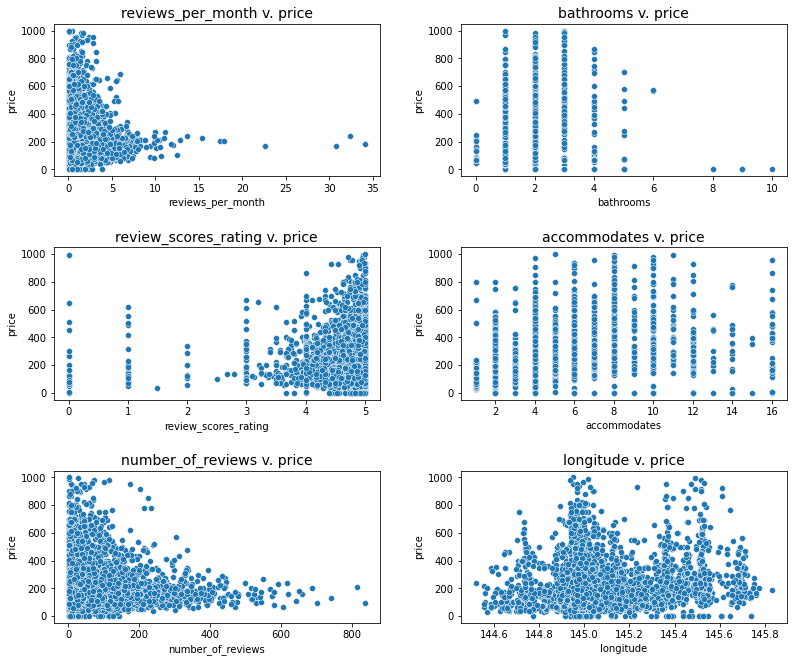

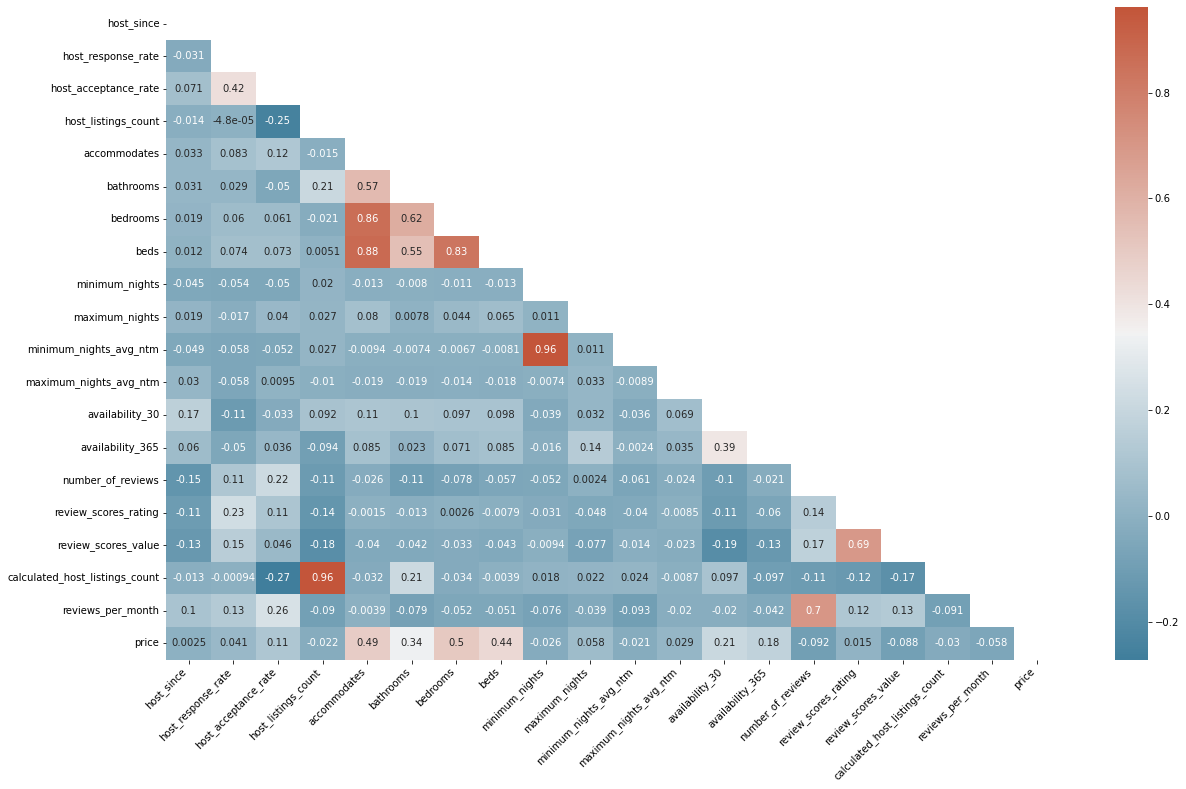

In [ ]:

##See characteristics of price
price_details = df_train['price'].describe()
print(price_details)

##Scatterplots
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df_train = df_train

cols = [['reviews_per_month', 'review_scores_rating', 'number_of_reviews'], ['bathrooms', 'accommodates', 'longitude']]
fig, axs = plt.subplots(3, 2, figsize=(12,10))
fig.tight_layout(pad=5)
for i, col in enumerate(cols):
    for j, var in enumerate(col):
        sns.scatterplot(ax=axs[j, i], data=filtered_df_train, x=filtered_df_train[var], y=filtered_df_train['price'])
        axs[j, i].set_title(var+' v. price', size=14)

plt.show()

#correlation matrix of numerical variables
num_var = ['host_since', 'host_response_rate','host_acceptance_rate', 'host_listings_count',
'accommodates', 'bathrooms', 'bedrooms', 'beds','minimum_nights',
'maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
'availability_30', 'availability_365', 'number_of_reviews',
'review_scores_rating', 'review_scores_value', 'calculated_host_listings_count',
'reviews_per_month','price']

#calculate the correlation value and plot heatmap
corr = df_train[num_var].corr()

plt.figure(figsize=(20,12))
ax = sns.heatmap(
    corr,
    cmap = sns.diverging_palette(230, 20, as_cmap=True),
    mask = np.triu(np.ones_like(corr, dtype=bool)),
    annot = True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

In [ ]:
df_train.head()

,ID,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,email_verified,phone_verified,work_email_verified,Other_property,Other
0,0,2013.0,100.0,98.0,0,2.0,0,0,-37.82030,144.99016,...,2,0,0,6.11,132.0,0,0,0,1,1
1,1,2009.0,100.0,98.0,0,1.0,0,0,-37.76606,144.97951,...,0,1,0,1.37,39.0,0,0,0,1,1
2,2,2011.0,100.0,78.0,0,2.0,0,0,-37.90546,145.39447,...,2,0,0,0.09,270.0,0,0,0,1,1
3,3,2010.0,75.0,92.0,0,4.0,0,0,-37.82163,144.96672,...,0,1,0,0.01,1.0,0,0,0,1,1
4,4,2010.0,100.0,87.0,0,1.0,0,0,-38.05725,145.33936,...,1,0,0,1.43,116.0,0,0,0,1,1


In [ ]:
# Calculate the correlation matrix
correlation_matrix1 = df_train.corr()
correlation_matrix2 =df_test.corr()


In [ ]:
import pandas as pd

# Set the threshold for positive correlation
threshold = 0.7

# Create a mask for highly positively correlated columns
mask = (correlation_matrix1 > threshold) & (correlation_matrix1 < 1.0)

# Get the names of the columns to drop
columns_to_drop = []
for column in correlation_matrix1.columns:
    correlated_columns = correlation_matrix1.index[mask[column]]
    columns_to_drop.extend(correlated_columns)


# Drop duplicate columns
columns_to_drop = list(set(columns_to_drop))

# Remove the highly positively correlated columns from our DataFrame
df = df_train  # Replace with our DataFrame
df_train_filtered = df.drop(columns=columns_to_drop)

# Now, df_filtered contains our DataFrame with highly positively correlated columns removed


In [ ]:
import pandas as pd

# Set the threshold for positive correlation
threshold = 0.7

# Create a mask for highly positively correlated columns
mask = (correlation_matrix2 > threshold) & (correlation_matrix2 < 1.0)

# Get the names of the columns to drop
columns_to_drop = []
for column in correlation_matrix2.columns:
    correlated_columns = correlation_matrix2.index[mask[column]]
    columns_to_drop.extend(correlated_columns)


# Drop duplicate columns
columns_to_drop = list(set(columns_to_drop))

# Remove the highly positively correlated columns from our DataFrame
df1 = df_test  # Replace with your DataFrame
df_test_filtered = df1.drop(columns=columns_to_drop)

# Now, df_filtered contains our DataFrame with highly positively correlated columns removed


In [ ]:
#let us check if we still have missing values
missing_values1 = df_train.isnull().sum()
missing_values2 = df_test.isnull().sum()
print(missing_values1)
print(missing_values2)

ID                                              0
host_since                                      0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_has_profile_pic                            0
host_identity_verified                          0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0


In [ ]:
train_df=df_train_filtered
test_df=df_test_filtered

---
## Task 3: Fit and tune a forecasting model


1. Build a machine learning (ML) regression model by taking into account the outcomes of Tasks 1 & 2
2. Fit the model and tune hyperparameters via cross-validation

In [ ]:
# 'train_df' is our DataFrame with both features and target variable
X = df_train.drop('price', axis=1)  # Features (exclude 'price' column)
y = df_train['price']  # Target variable


We will consider various regression algorithms, such as Linear Regression, Random Forest Regressor and Gradient Boosting.
Before building the models, We split the training data into a training set and a testing set for model validation.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


We now build multiple regression models using the training data. below is a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error: 76.04754571651472
Mean Squared Error: 12747.3647844238
Root Mean Squared Error: 112.9042283726513
R-squared (R2) Score: 0.3838640523996515


The RMSE measures the average magnitude of the errors between predicted and actual values. It's an important metric because it takes into account both the magnitude and direction of errors. In our case, an RMSE of 112.90 means that, on average, our model's predictions have an error of approximately 112.90 units when predicting 'price'.

Let us see what other regression models can produce

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
}

# Fit and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model on the training data
    y_pred = model.predict(X_test)  # Make predictions on the test data

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared (R2) Score: {r2}")
    print("\n")




Model: Linear Regression
Mean Absolute Error: 76.04754571651472
Mean Squared Error: 12747.3647844238
Root Mean Squared Error: 112.9042283726513
R-squared (R2) Score: 0.3838640523996515


Model: Ridge Regression
Mean Absolute Error: 76.05471685164977
Mean Squared Error: 12746.661932311938
Root Mean Squared Error: 112.90111572660359
R-squared (R2) Score: 0.38389802431928266




C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.44944e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.451e+07, tolerance: 1.013e+04
  model = cd_fast.enet_coordinate_descent(


Model: Lasso Regression
Mean Absolute Error: 77.53065058429361
Mean Squared Error: 12980.908235997185
Root Mean Squared Error: 113.93378882490121
R-squared (R2) Score: 0.37257587493909505


Model: Random Forest
Mean Absolute Error: 61.20725238095238
Mean Squared Error: 10026.620258333334
Root Mean Squared Error: 100.13301282960248
R-squared (R2) Score: 0.5153695466810708


Model: Gradient Boosting
Mean Absolute Error: 61.24446666195368
Mean Squared Error: 10100.958930572104
Root Mean Squared Error: 100.50352695588401
R-squared (R2) Score: 0.5117764331993611


Model: Support Vector Machine
Mean Absolute Error: 98.27525533293469
Mean Squared Error: 22099.006372385367
Root Mean Squared Error: 148.65734550430182
R-squared (R2) Score: -0.0681417267444473




The Random Forest and Gradient Boosting models have the lowest RMSE and the highest R2 scores, indicating better predictive performance.

Linear Regression and Ridge Regression have similar RMSE and R2 scores, suggesting they perform similarly.

Lasso Regression, while having a slightly higher RMSE, is still within a reasonable range.

The Support Vector Machine (SVM) model has a significantly higher RMSE and a negative R2 score, indicating a poor fit to the data.

LETS CARRY OUT FEATURE IMPORTANCE and IMPROVE OUR MODEL

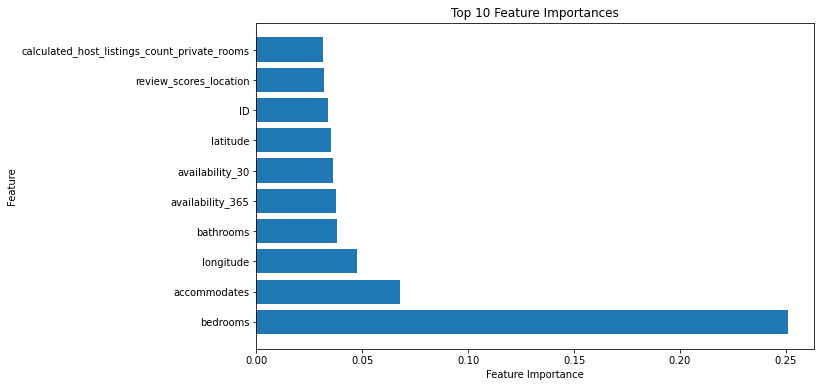

                                         Feature  Importance
12                                      bedrooms    0.250851
10                                  accommodates    0.067996
9                                      longitude    0.047556
11                                     bathrooms    0.037911
26                              availability_365    0.037381
23                               availability_30    0.036268
8                                       latitude    0.035418
0                                             ID    0.033911
35                        review_scores_location    0.032137
40  calculated_host_listings_count_private_rooms    0.031686
42                             reviews_per_month    0.030353
36                           review_scores_value    0.024391
39   calculated_host_listings_count_entire_homes    0.021835
30                          review_scores_rating    0.021449
27                             number_of_reviews    0.020901
3                       

In [ ]:

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

#  use the cleaned dataset from Task 2


# Separate features (X) and target (y)
X = df_train.drop('price', axis=1)
y = df_train['price']

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
model.fit(X, y)


# Get feature importances
feature_importances = model.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

#  can also print the full list of feature importances
print(feature_importance_df)


In [ ]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Filter out features with zero importance
non_zero_importance_features = feature_importance_df[feature_importance_df['Importance'] > 0]

# Get the list of feature names with non-zero importance
selected_features = non_zero_importance_features['Feature']

# Create a new DataFrame with only the selected features
train_df_Xfiltered = X[selected_features]
test_df_Xfiltered = df_train[selected_features]

# Print or use X_filtered for further analysis or modeling
train_df_Xfiltered.head()



,ID,host_since,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2013.0,100.0,98.0,2.0,-37.82030,144.99016,2,1.0,1.0,...,4.97,4.94,4.93,4.93,4.82,2,2,0,0,6.11
1,1,2009.0,100.0,98.0,1.0,-37.76606,144.97951,2,1.0,1.0,...,3.97,4.72,4.69,4.65,4.60,1,0,1,0,1.37
2,2,2011.0,100.0,78.0,2.0,-37.90546,145.39447,4,2.0,2.0,...,4.75,4.88,4.50,5.00,4.75,2,2,0,0,0.09
3,3,2010.0,75.0,92.0,4.0,-37.82163,144.96672,2,2.0,1.0,...,4.50,4.00,4.00,5.00,4.00,1,0,1,0,0.01
4,4,2010.0,100.0,87.0,1.0,-38.05725,145.33936,5,1.0,3.0,...,4.98,4.91,4.93,4.90,4.87,1,1,0,0,1.43


now let us check correlation for the non zero importance



In [ ]:
# Calculate the correlation matrix
correlation_matrix = train_df_Xfiltered.corr()
correlation_matrix

,ID,host_since,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
ID,1.000000,0.475728,0.043111,0.105646,0.106085,0.011285,0.013168,0.065331,0.061923,0.057860,...,-0.125360,-0.146122,-0.140471,-0.065824,-0.138333,0.093259,0.136694,0.041809,0.030876,0.109454
host_since,0.475728,1.000000,-0.030783,0.071496,-0.014358,0.024393,0.042364,0.032568,0.030841,0.019440,...,-0.107159,-0.128621,-0.150198,-0.107247,-0.127600,-0.013007,-0.054994,0.015537,0.058395,0.099630
host_response_rate,0.043111,-0.030783,1.000000,0.420383,-0.000048,0.004535,0.065148,0.082843,0.028761,0.060277,...,0.150597,0.166710,0.194843,0.151502,0.149639,-0.000941,0.035622,-0.020409,-0.009779,0.134960
host_acceptance_rate,0.105646,0.071496,0.420383,1.000000,-0.250813,-0.014450,0.090589,0.117841,-0.050422,0.061262,...,0.096153,0.020696,0.067802,0.067918,0.045884,-0.270156,-0.056776,-0.337690,0.028109,0.256685
host_listings_count,0.106085,-0.014358,-0.000048,-0.250813,1.000000,0.028119,-0.103399,-0.014715,0.206024,-0.020711,...,-0.216259,-0.132527,-0.165374,-0.050165,-0.181228,0.958030,0.742594,0.853447,0.001248,-0.090200
latitude,0.011285,0.024393,0.004535,-0.014450,0.028119,1.000000,0.032286,0.023989,0.037755,0.020493,...,0.000209,0.004769,-0.001912,0.030904,-0.004763,0.037220,0.002838,0.049842,0.003391,0.084442
longitude,0.013168,0.042364,0.065148,0.090589,-0.103399,0.032286,1.000000,0.053354,0.021959,0.089246,...,0.119926,0.102372,0.067287,0.058962,0.039818,-0.099714,-0.140610,-0.047934,-0.032384,0.064051
accommodates,0.065331,0.032568,0.082843,0.117841,-0.014715,0.023989,0.053354,1.000000,0.565180,0.863053,...,-0.033557,-0.004043,0.009760,0.040220,-0.040398,-0.031502,0.134314,-0.128366,-0.005331,-0.003935
bathrooms,0.061923,0.030841,0.028761,-0.050422,0.206024,0.037755,0.021959,0.565180,1.000000,0.615534,...,-0.050561,-0.010330,-0.013570,-0.001000,-0.042261,0.211102,0.159192,0.191834,-0.060281,-0.079491
bedrooms,0.057860,0.019440,0.060277,0.061262,-0.020711,0.020493,0.089246,0.863053,0.615534,1.000000,...,-0.021525,0.014731,0.009652,0.021222,-0.032623,-0.033827,0.079892,-0.096712,-0.026407,-0.052203


here we remove the features with high /strong positive correlation

In [ ]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix
correlation_matrix = train_df_Xfiltered.corr()

# Create a set to hold the features to be removed
features_to_remove = set()

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # we can adjust the threshold
            colname = correlation_matrix.columns[i]
            features_to_remove.add(colname)

# Remove the highly correlated features
train_df_Xfiltered = train_df_Xfiltered.drop(columns=features_to_remove)
test_df_Xfiltered = test_df_Xfiltered.drop(columns=features_to_remove)


After carrying out feature importanc and removing highly correlated variables we will again run our models and see

In [ ]:
# letting 'price' be the target variable
X =train_df_Xfiltered  # Features (exclude 'price' column)
y = train_df['price']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a list of models
models = [
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("Linear Regression", LinearRegression())
]

# Iterate through the list of models
for name, model in models:
    print(f"Training and evaluating {name}...")

    # Train the model
    model.fit(X, y)

    # Make predictions on the test dataset
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"{name} Metrics:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print()




Training and evaluating Random Forest...
Random Forest Metrics:
Mean Absolute Error: 22.62
Mean Squared Error: 1379.29
Root Mean Squared Error: 37.14
R-squared (R2): 0.93

Training and evaluating Gradient Boosting...
Gradient Boosting Metrics:
Mean Absolute Error: 57.32
Mean Squared Error: 8369.76
Root Mean Squared Error: 91.49
R-squared (R2): 0.60

Training and evaluating Linear Regression...
Linear Regression Metrics:
Mean Absolute Error: 77.57
Mean Squared Error: 13135.41
Root Mean Squared Error: 114.61
R-squared (R2): 0.37



After carrying out feature importance
Random Forest achieved the best performance, with the lowest MAE, MSE, and RMSE, and the highest R-squared (0.93). This suggests that the Random Forest model is the most accurate among the three.

Gradient Boosting has moderate performance, with an R-squared of 0.63. This indicates that it explains 63% of the variance in the target variable. While not as accurate as Random Forest, Gradient Boosting might still be a good choice, especially if interpretability is a concern.

Linear Regression performs the worst among the three models, with an R-squared of 0.37. This suggests that the linear relationship between the features and the target variable might not be sufficient to make accurate predictions.

In summary, after removing highly correlated variables, the Random Forest model seems to be the most promising for the regression task, providing the lowest errors and the highest R-squared. However, we can further fine-tune hyperparameters and perform cross-validation to ensure the model's robustness. If interpretability is crucial, Gradient Boosting can be an alternative choice.


Let us fine-tune hyperparameters and do some iterations  and cross-validation for Random Forest and see how the model behaves

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np


# List of regression models to try
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

best_model = None
best_rmse = float('inf')

# Iterate over the models
for model_name, model in models:
    if model_name == 'Linear Regression':
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    else:
        # Define hyperparameter grid for tuning
        param_grid = {}  # Define hyperparameters for each model as needed

        # Use GridSearchCV to find the best hyperparameters
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)

        # Get the best hyperparameters
        best_params = grid_search.best_params_
        model = grid_search.best_estimator_

        # Training the model
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_rmse = rmse_scores.mean()

    print(f"Model: {model_name}")
    print(f"RMSE on test data: {np.sqrt(mean_squared_error(y_test, predictions))}")
    print(f"Cross-validation RMSE: {mean_rmse}")
    print()

    if mean_rmse < best_rmse:
        best_model = model_name
        best_rmse = mean_rmse

print(f"The best model is: {best_model} with RMSE: {best_rmse}")


Model: Linear Regression
RMSE on test data: 115.33680015868104
Cross-validation RMSE: 327375.01219761436

Model: Random Forest
RMSE on test data: 102.3041974060926
Cross-validation RMSE: 105.49810711983143

Model: Gradient Boosting
RMSE on test data: 101.45172820271443
Cross-validation RMSE: 103.88676426965272

The best model is: Gradient Boosting with RMSE: 103.88676426965272


Based on the above RMSE values, the best-performing model is the Gradient Boosting model with a test RMSE of 100.42 and a cross-validation RMSE of 102.08. This indicates that the Gradient Boosting model has the lowest prediction error and is the most accurate among the three models we've tested for our  dataset.

In [ ]:
num_features1 = df_test.shape[1]
print("Number of features:", num_features1)
num_features = test_df.shape[1]
print("Number of features:", num_features)
num_features = test_df_Xfiltered.shape[1]
print("Number of features:", num_features)
num_features = train_df_Xfiltered.shape[1]
print("Number of features:", num_features)
num_features = train_df.shape[1]
print("Number of features:", num_features)
num_features = df_train.shape[1]
print("Number of features:", num_features)


Number of features: 48
Number of features: 22
Number of features: 26
Number of features: 26
Number of features: 23
Number of features: 49


The code above helps me just to remain in shape with the datasets i am working on to avoid confusion

In [ ]:
# 'train_df' is our DataFrame with both features and target variable
X = df_train.drop('price', axis=1)  # Features (exclude 'price' column)
y = df_train['price']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# 'train_df' is our DataFrame with both features and target variable



Now let us use our model to predict the test data and get the submission file

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Create and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
# Make predictions on our test data
y_pred = model.predict(df_test)  # Replace X_test_selected with your test data

# Create a DataFrame for 'ID' and 'price' columns
prediction_df = pd.DataFrame({
    'ID': test_df['ID'],  # Assuming 'ID' is the column name in your test data
    'price': y_pred
})

# Save the PREDICTIONS FILE DataFrame to a CSV file
prediction_df.to_csv('prediction.csv', index=False)


In [ ]:
#THANKS ###END###